# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

With the rapid growth of esports, understanding the current overall trends is a fascinating endeavor. By analyzing the data from Esports Earnings 1998-2023 on Kaggle, we can quickly gain insights:

1. Top 10 Earnings by Game All Times
2. Top Genre Earnings All Times

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import os
import seaborn as sns
plt.style.use('ggplot')

#### **Dataset 1:** GeneralEsportData

I chose this dataset because I am curious about every esports game release day, and the data set contains every esports game's total prize in the tournament. We can easily find which game's tournaments have the largest prize pool.

Type: CSV File

Method: The data was gathered using the "Downloading files" method from [Kaggle](https://www.kaggle.com/datasets/rankirsh/esports-earnings/data?select=GeneralEsportData.csv.)

Dataset variables:

*   *Variable 1 GAME: Game name
*   *Variable 2 ReleaseDate: Release Date of game
*   *Variable 3 Genre: Genre of game
*   *Variable 4 TotalEarnings: Total prizepool allocated in tournaments
*   *Variable 5 OfflineEarnings: Amount of earnings allocated in Offline/Lan events
*   *Variable 6 PercentOffline: Percent of earnings coming from offline tournaments
*   *Variable 7 TotalPlayers: Total amount of players who received a prize
*   *Variable 8 TotalTournaments: Total amount of tournaments in the site

In [2]:
#download data manually
path = "Data/GeneralEsportData.csv"
df_games = pd.read_csv(path)
df_games.head(2)

,Game,ReleaseDate,Genre,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,510716.46,375857.63,0.735942,473,265
1,Age of Empires II,1999,Strategy,3253232.59,1139384.57,0.350232,1994,1613


#### Dataset 2 HistoricalEsportData.csv

I chose this dataset because I am curious about historical esports data. In this file, we can find monthly data from 01/1998 to 10/2023 containing earnings for every game on the site.

Type: CSV File

Method: The data was gathered using the "Programmatically" method from  [Kaggle](https://www.kaggle.com/datasets/rankirsh/esports-earnings/data?select=GeneralEsportData.csv.)

Dataset variables:

*   *Variable 1 Date: Month
*   *Variable 2 Game: Game name
*   *Variable 3 Earnings: The earnings from the tournaments
*   *Variable 4 Players: The player who participate in the tournaments
*   *Variable 5 Tournaments: The number of tournaments held

In [3]:
#download data programmatically
# Get the file ID from the Google Drive link
file_id = '1B08LUIPy7jiTjbitMAWqvcVly5EFPfea'

# Construct the direct download link
download_link = f'https://drive.google.com/uc?id={file_id}'

# Download the file
def download_data():
    r = requests.get(download_link, allow_redirects=True)
    open('Data/HistoricalEsportData.csv', 'wb').write(r.content)

download_data()

In [4]:
df_earnings = pd.read_csv('Data/HistoricalEsportData.csv')
df_earnings.head(2)

,Date,Game,Earnings,Players,Tournaments
0,1998-01-01,Command & Conquer: Red Alert,15000.0,8,1
1,1998-01-01,QuakeWorld,15000.0,8,1


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [5]:
#Optional: store the raw data in your local data store
df_games_clean = df_games.copy()
df_earnings_clean = df_earnings.copy()

print(df_games_clean.shape)
print(df_earnings_clean.shape)

(650, 8)
(9244, 5)


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### GAMES Dataframe

In [6]:
#Inspecting the dataframe visually
df_games_clean.head(2)

,Game,ReleaseDate,Genre,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,510716.46,375857.63,0.735942,473,265
1,Age of Empires II,1999,Strategy,3253232.59,1139384.57,0.350232,1994,1613


In [7]:
df_games_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Game              650 non-null    object 
 1   ReleaseDate       650 non-null    int64  
 2   Genre             650 non-null    object 
 3   TotalEarnings     650 non-null    float64
 4   OfflineEarnings   650 non-null    float64
 5   PercentOffline    583 non-null    float64
 6   TotalPlayers      650 non-null    int64  
 7   TotalTournaments  650 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 40.8+ KB


Quality Issue1 - Accuracy: The `ReleaseDate` is in int64, but it should be date-time type.

In [8]:
df_games_clean.describe()

,ReleaseDate,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments
count,650.000000,6.500000e+02,6.500000e+02,583.000000,650.000000,650.000000
mean,2012.576923,2.527759e+06,1.774991e+06,0.659145,226.541538,94.078462
std,7.436703,1.758171e+07,1.377120e+07,0.412233,964.342887,479.807202
min,1981.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,2007.000000,1.000000e+03,0.000000e+00,0.219244,4.000000,1.000000
50%,2015.000000,3.636129e+04,1.500000e+04,0.906896,22.000000,5.000000
75%,2019.000000,2.563600e+05,1.715892e+05,1.000000,99.500000,27.750000
max,2023.000000,3.371080e+08,2.982906e+08,1.000000,16272.000000,7245.000000


Quality Issue2 - Invalid data: We can find 0 in `TotalEarnings`. We can drop it.

In [9]:
#Inspecting the dataframe programmatically
# check missing value
df_games_clean.isnull().sum()

Game                 0
ReleaseDate          0
Genre                0
TotalEarnings        0
OfflineEarnings      0
PercentOffline      67
TotalPlayers         0
TotalTournaments     0
dtype: int64

In [10]:
#check duplicate value
sum(df_games_clean.duplicated())

0

In [11]:
df_games_clean['Genre'].unique()

array(['Strategy', 'First-Person Shooter',
       'Multiplayer Online Battle Arena', 'Role-Playing Game',
       'Fighting Game', 'Racing', 'Sports', 'Collectible Card Game',
       'Puzzle Game', 'Battle Royale', 'Third-Person Shooter',
       'Music / Rhythm Game'], dtype=object)

Tidiness Issue1 - Clarity: The value name is hard to identify. We can make it more transparent by simplifying it.

In [12]:
df_games_clean[df_games_clean['Game'] == 'Samurai Shodown (2019)']

,Game,ReleaseDate,Genre,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments
350,Samurai Shodown (2019),2019,Fighting Game,77983.31,77858.31,0.998397,75,20


In [13]:
# check multiple variables
df_games_clean['Game'].unique()

array(['Age of Empires', 'Age of Empires II', 'Age of Empires III',
       'Age of Empires IV', 'Age of Empires Online', 'Age of Mythology',
       'Among Us', 'Auto Chess', 'Brawl Stars', 'Chess.com', 'chess24',
       'chessarena.com', 'Clash of Clans', 'Clash Royale',
       'Clash Royale x Chess', 'Command & Conquer 3',
       'Command & Conquer: Red Alert', 'Company of Heroes 2', 'ComPet',
       'Dead By Daylight', 'Dead by Daylight Mobile', 'Dota Underlords',
       'Endgods', 'Farming Simulator 19', 'Farming Simulator 22',
       'Grey Goo', 'Heroes of Might and Magic III', 'Identity V',
       'Internet Chess Club', 'Iron Harvest', 'Legion TD 2', 'Lichess',
       'Loco Dojo Unleashed', 'Men of War: Assault Squad 2',
       'Multigaming', 'Playchess.com', 'Pokémon GO', 'Pokémon VGC',
       'Prophecy', 'Rise of Nations: Rise of Legends', 'Sea of Thieves',
       'Star Wars: Squadrons', 'StarCraft II', 'StarCraft: Brood War',
       'StarCraft: Remastered', 'Summoners War: Sky 

Tidiness Issue2 - Multiple variables: The value name includes two variables. We can remove it since we already have `ReleaseDate`. We need to confirm whether it is the Game name or just the multiple variables. Include 'Doom (2016)', 'Killer Instinct (2013)', 'Samurai Shodown (2019)'.

### Earnings Dataframe

In [14]:
#Inspecting the dataframe visually
df_earnings_clean.head(2)

,Date,Game,Earnings,Players,Tournaments
0,1998-01-01,Command & Conquer: Red Alert,15000.0,8,1
1,1998-01-01,QuakeWorld,15000.0,8,1


In [15]:
df_earnings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9244 entries, 0 to 9243
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         9244 non-null   object 
 1   Game         9244 non-null   object 
 2   Earnings     9244 non-null   float64
 3   Players      9244 non-null   int64  
 4   Tournaments  9244 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 361.2+ KB


Quality Issue3 - Accuracy: The `Date` is in object, but it should be date-time type.

In [16]:
df_earnings_clean.describe()

,Earnings,Players,Tournaments
count,9.244000e+03,9244.000000,9244.000000
mean,1.796551e+05,59.721874,6.633600
std,1.017222e+06,130.098551,12.098553
min,0.000000e+00,0.000000,1.000000
25%,1.075000e+03,6.000000,1.000000
50%,1.026800e+04,16.000000,2.000000
75%,7.150557e+04,51.000000,6.000000
max,4.013865e+07,1719.000000,172.000000


Quality Issue4 - Accuracy: `Earnings` have a 0 value, we need to filter out.

In [17]:
#FILL IN - Inspecting the dataframe programmatically
# check missing value
df_earnings_clean.isnull().sum()

Date           0
Game           0
Earnings       0
Players        0
Tournaments    0
dtype: int64

In [18]:
# check duplicate value
sum(df_earnings_clean.duplicated())

0

In [19]:
# check the value should be integer or float
df_earnings['Earnings'].sample(4)

4343     85600.00
4369      1500.00
7109      3000.00
3695    170465.17
Name: Earnings, dtype: float64

In [20]:
df_earnings_clean['Game'].value_counts()

Super Smash Bros. Melee          213
Age of Empires II                204
WarCraft III                     203
StarCraft: Brood War             179
StarCraft II                     165
                                ... 
Sprint Vector                      1
SNK Heroines: Tag Team Frenzy      1
F1 2018                            1
Creative Destruction               1
EA Sports FC Online                1
Name: Game, Length: 597, dtype: int64

In [21]:
# check multiple variables
df_earnings_clean['Game'].unique()

array(['Command & Conquer: Red Alert', 'QuakeWorld', 'Quake II',
       'Total Annihilation', 'StarCraft: Brood War', 'Age of Empires',
       'Descent 3', 'Quake III Arena', 'Age of Empires II',
       'Marvel vs. Capcom 2', 'Street Fighter Alpha 2',
       'Street Fighter Alpha 3', 'Street Fighter III: 3rd Strike',
       'Super Street Fighter II Turbo', 'FIFA 2000',
       'Doom II: Hell on Earth', 'Counter-Strike', 'Capcom vs. SNK',
       'FIFA 2001', 'Unreal Tournament', 'Aliens versus Predator 2',
       'Super Smash Bros. Melee', 'Return to Castle Wolfenstein',
       'Capcom vs. SNK 2', 'WarCraft III', 'FIFA 2002 World Cup',
       'Halo: Combat Evolved', 'Unreal Tournament 2003',
       'NASCAR Thunder 2002', 'Star Wars Jedi Knight II: Jedi Outcast',
       'Tekken 4', 'Age of Mythology', 'NASCAR Thunder 2003', 'FIFA 03',
       'Guilty Gear XX', 'Soul Calibur II', 'Tekken Tag Tournament',
       'Virtua Fighter 4: Evolution', 'Day of Defeat',
       'Gran Turismo 3: A-Spec',

Tidiness Issue2 - Multiple variables: The value name includes two variables. We can remove it since we already have `ReleaseDate`. We need to confirm whether it is the Game name or just the multiple variables. Include 'Doom (2016)', 'Killer Instinct (2013)', 'Samurai Shodown (2019)'.

In [22]:
# check the consistency
df_earnings_clean['Date'].sample(4)

5370    2019-02-01
9070    2023-06-01
5667    2019-06-01
8007    2022-01-01
Name: Date, dtype: object

### Quality Issue
#### In GAMES Dataframe, we discover:

Quality Issue1 - Accuracy: The `ReleaseDate` is in int64, but it should be date-time type.

Quality Issue2 - Invalid data: We can find 0 in `TotalEarnings`. We can drop it.

#### In Earnings Dataframe, we discover:

Quality Issue3 - Accuracy: The `Date` is in object, but it should be date-time type.

Quality Issue4 - Accuracy: `Earnings` have a 0 value, we need to filter out.

### Tidiness Issue
#### In GAMES Dataframe, we discover:

Tidiness Issue1 - Clarity: The `Genre`'s value name is hard to identify. We can make it more transparent by simplifying it.

Tidiness Issue2 - Multiple variables: The `Game`'s value name includes two variables. We can remove it since we already have `ReleaseDate`. We need to confirm whether it is the Game name or just the multiple variables. Include 'Doom (2016)', 'Killer Instinct (2013)', 'Samurai Shodown (2019)'.

#### In Earnings Dataframe, we discover:

Also the Tidiness Issue2, we need to rename it.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

### **Quality Issue 1 - Accuracy:  The `ReleaseDate` is in int64, but it should be date-time type.**

In [23]:
# FILL IN - Apply the cleaning strategy
df_games_clean.head(2)

,Game,ReleaseDate,Genre,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,510716.46,375857.63,0.735942,473,265
1,Age of Empires II,1999,Strategy,3253232.59,1139384.57,0.350232,1994,1613


In [24]:
df_games_clean['ReleaseDate'] = pd.to_datetime(df_games_clean['ReleaseDate'])

In [25]:
# FILL IN - Validate the cleaning was successful
df_games_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Game              650 non-null    object        
 1   ReleaseDate       650 non-null    datetime64[ns]
 2   Genre             650 non-null    object        
 3   TotalEarnings     650 non-null    float64       
 4   OfflineEarnings   650 non-null    float64       
 5   PercentOffline    583 non-null    float64       
 6   TotalPlayers      650 non-null    int64         
 7   TotalTournaments  650 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 40.8+ KB


Justification: Change `ReleaseDate` data type to date-time.

### **Quality Issue 2 - Invalid data: We can find 0 in `TotalEarnings`. We can drop it.**

In [26]:
# Drop rows where 'TotalEarnings' is 0
df_games_clean = df_games_clean[df_games_clean['TotalEarnings'] != 0]

In [27]:
#FILL IN - Validate the cleaning was successful
df_games_clean['TotalEarnings'].describe()

count    5.830000e+02
mean     2.818256e+06
std      1.854405e+07
min      1.000000e+01
25%      4.949385e+03
50%      5.118041e+04
75%      4.280790e+05
max      3.371080e+08
Name: TotalEarnings, dtype: float64

In [28]:
# reset index
df_games_clean = df_games_clean.reset_index(drop=True)

Justification: Filter out the rows where `TotalEarnings` is 0.

### **Quality Issue 3 - Accuracy: The `Date` is in object, but it should be date-time type.**

In [29]:
# change the data type
df_earnings_clean['Date'] = pd.to_datetime(df_earnings_clean['Date'])

In [30]:
#Validate the cleaning was successful
df_earnings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9244 entries, 0 to 9243
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         9244 non-null   datetime64[ns]
 1   Game         9244 non-null   object        
 2   Earnings     9244 non-null   float64       
 3   Players      9244 non-null   int64         
 4   Tournaments  9244 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 361.2+ KB


Justification: Change `Date` data type to date-time.

### **Quality Issue 4 - Accuracy: `Earnings` have a 0 value, we need to filter out.**

In [31]:
# Drop rows where 'TotalEarnings' is 0
df_earnings_clean = df_earnings_clean[df_earnings_clean['Earnings'] != 0]

In [32]:
# Validate the cleaning was successful
df_earnings_clean['Earnings'].describe()

count    9.057000e+03
mean     1.833644e+05
std      1.027340e+06
min      1.000000e+01
25%      1.250000e+03
50%      1.123142e+04
75%      7.500000e+04
max      4.013865e+07
Name: Earnings, dtype: float64

In [33]:
# reset index
df_earnings_clean = df_earnings_clean.reset_index(drop=True)

Justification: Filter out the rows where `Earnings` is 0.

### **Tidiness Issue 1 - Clarity: The `Genre` 's value name is hard to identify. We can make it more transparent by simplifying it.**

To avoid doing the thing twice, we merge two data frames first.

In [34]:
# Merge 2 data frames into one
df_esports = df_earnings.merge(df_games[['Game','Genre','ReleaseDate']], on = 'Game')
df_esports.head()

,Date,Game,Earnings,Players,Tournaments,Genre,ReleaseDate
0,1998-01-01,Command & Conquer: Red Alert,15000.0,8,1,Strategy,1996
1,1998-01-01,QuakeWorld,15000.0,8,1,First-Person Shooter,1996
2,1998-05-01,QuakeWorld,300.0,3,1,First-Person Shooter,1996
3,1998-11-01,QuakeWorld,30000.0,17,1,First-Person Shooter,1996
4,2001-07-01,QuakeWorld,15000.0,8,1,First-Person Shooter,1996


Now, we can use the new data frame to address the tidiness issue.

In [35]:
# Simplified the name by renaming
df_esports.Genre.replace(
    {
        'First-Person Shooter' : 'FPS',
        'Multiplayer Online Battle Arena' : 'MOBA',
        'Role-Playing Game' : 'RPG',
        'Third-Person Shooter' : 'TPS'
    }, inplace = True
)

In [36]:
# Validate the cleaning was successful
df_esports.Genre.unique()

array(['Strategy', 'FPS', 'Fighting Game', 'Sports', 'Racing', 'MOBA',
       'RPG', 'TPS', 'Music / Rhythm Game', 'Collectible Card Game',
       'Puzzle Game', 'Battle Royale'], dtype=object)

Justification: Use .replace to rename the value which is too long to identify.

### **Tidiness Issue 2 - Multiple variables: The `Game`'s value name includes two variables. We can remove it since we already have ReleaseDate. We need to confirm whether it is the Game name or just the multiple variables. Include 'Doom (2016)', 'Killer Instinct (2013)', 'Samurai Shodown (2019)'.**

In [37]:
# exclude the variable we do not need
df_esports.Game.replace({"Doom (2016)": 'Doom',
                         "Killer Instinct (2013)": 'Killer Instinct',
                         "Samurai Shodown (2019)": 'Samurai Shodown',
                         }, inplace = True)

# Simplified the name by renaming
df_esports.Game.replace({"Counter-Strike: Global Offensive": 'CS:GO',
                         "PLAYERUNKNOWN'S BATTLEGROUNDS Mobile": 'PUBG Mobile',
                         "PLAYERUNKNOWN’S BATTLEGROUNDS": 'PUBG',
                         "Arena of Valor": 'AoV',
                         "League of Legends": 'LoL'
                         }, inplace = True)

In [38]:
#FILL IN - Validate the cleaning was successful
df_esports.Game.unique()

array(['Command & Conquer: Red Alert', 'QuakeWorld', 'Quake II',
       'Total Annihilation', 'StarCraft: Brood War', 'Age of Empires',
       'Descent 3', 'Quake III Arena', 'Age of Empires II',
       'Marvel vs. Capcom 2', 'Street Fighter Alpha 2',
       'Street Fighter Alpha 3', 'Street Fighter III: 3rd Strike',
       'Super Street Fighter II Turbo', 'FIFA 2000',
       'Doom II: Hell on Earth', 'Counter-Strike', 'Capcom vs. SNK',
       'FIFA 2001', 'Unreal Tournament', 'Aliens versus Predator 2',
       'Super Smash Bros. Melee', 'Return to Castle Wolfenstein',
       'Capcom vs. SNK 2', 'WarCraft III', 'FIFA 2002 World Cup',
       'Halo: Combat Evolved', 'Unreal Tournament 2003',
       'NASCAR Thunder 2002', 'Star Wars Jedi Knight II: Jedi Outcast',
       'Tekken 4', 'Age of Mythology', 'NASCAR Thunder 2003', 'FIFA 03',
       'Guilty Gear XX', 'Soul Calibur II', 'Tekken Tag Tournament',
       'Virtua Fighter 4: Evolution', 'Day of Defeat',
       'Gran Turismo 3: A-Spec',

Justification: Use .replace to rename the value which is too long to identify.

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [39]:
#FILL IN - saving data
#FILL IN - saving data
df_esports.to_csv('Data/df_esports.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

**Research question:**
1. Top 10 Earnings by Game All Times
2. Top Genre Earnings All Times

#### 1. Top 10 Earnings by Game All Times

In [40]:
# Calculating earnings
topgames = df_esports.copy()
topgames = topgames.groupby(['Game', 'ReleaseDate', 'Genre'])['Earnings'].sum().reset_index()
topgames.head()

,Game,ReleaseDate,Genre,Earnings
0,ARMS,2017,Fighting Game,22559.90
1,Acceleration of SUGURI 2,2018,Fighting Game,410.00
2,After-H,2019,FPS,44880.40
3,Age of Empires,1997,Strategy,510716.46
4,Age of Empires II,1999,Strategy,3254332.59


Because the `Earnings` variable is vast, we round it in Millions of USD.

In [41]:
# Converting into Million USD
topgames['Earnings'] = round(topgames['Earnings']/1000000)
topgames = topgames.sort_values('Earnings', ascending=False, ignore_index=True)
topgames.head(10)

,Game,ReleaseDate,Genre,Earnings
0,Dota 2,2013,MOBA,337.0
1,Fortnite,2017,Battle Royale,170.0
2,CS:GO,2012,FPS,162.0
3,LoL,2009,MOBA,105.0
4,AoV,2015,MOBA,86.0
5,PUBG Mobile,2017,Battle Royale,74.0
6,PUBG,2017,Battle Royale,57.0
7,StarCraft II,2010,Strategy,40.0
8,Rainbow Six Siege,2015,FPS,39.0
9,Rocket League,2015,Sports,35.0


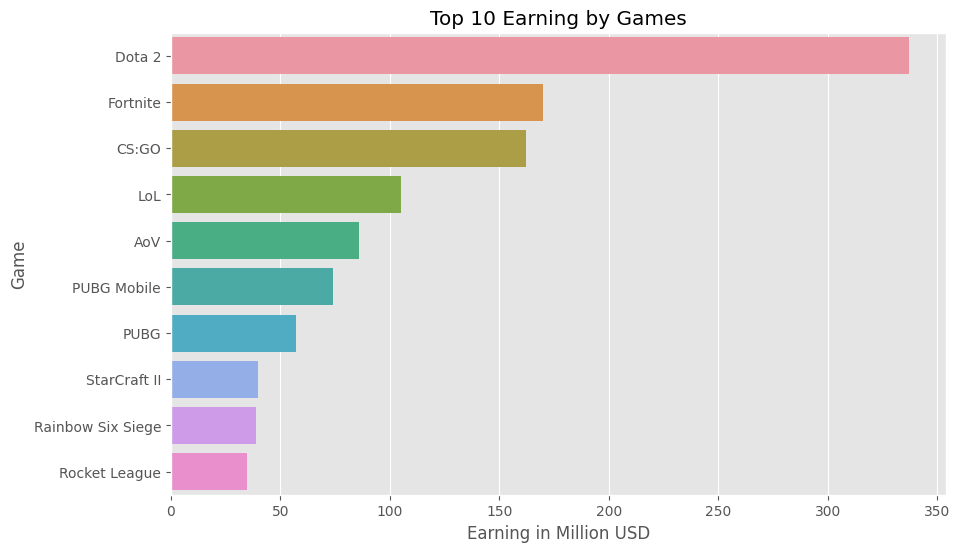

In [42]:
# Making a bar chart
plt.figure(figsize=(10,6))
sns.barplot(x = 'Earnings',
            y = 'Game',
            data = topgames.head(10),)
plt.xlabel('Earning in Million USD')
plt.title('Top 10 Earning by Games')
plt.show()

After reviewing the analysis charts, it was surprising to discover that Dota 2's global popularity may not have surpassed that of LoL. Moreover, Dota 2 was released later than LoL, yet its overall prize pool is significantly higher. Some discussions suggest that this might be due to LoL adopting a franchise system, which may result in a lower prize pool than in other games. Another noteworthy point is that Fortnite, released in 2017, currently holds the second position, highlighting its immense impact.

In [43]:
# Calculate the sum of earnings for each genre
genre_counts = topgames.groupby('Genre')['Earnings'].sum()

# Sorted top to down
sorted_genres = genre_counts.sort_values(ascending=False)

# sorted top 3 genres
top_genres = sorted_genres[:3]
other_genres = sorted_genres[3:].sum()

In [44]:
# Create a new series (combining Top 4 genres & other genres)
new_genre_counts = pd.concat([top_genres, pd.Series([other_genres], index=['Other'])])

new_genre_counts

MOBA             591.0
FPS              408.0
Battle Royale    339.0
Other            302.0
dtype: float64

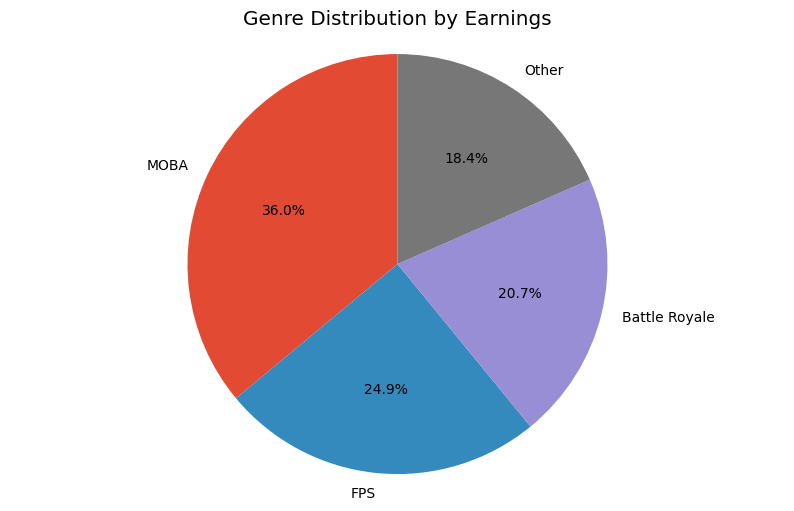

In [61]:
# Making a Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(new_genre_counts, labels=new_genre_counts.index, autopct='%.1f%%', startangle=90)
plt.axis('equal')
plt.title('Genre Distribution by Earnings')
plt.show()

The charts above show that the prize money for MOBA games far exceeds that of other genres, totaling 591 million USD. This also indicates the immense popularity of this genre, with three out of the top five games being MOBAs. The presence of CS-related series in the top ranks is expected, given their established status among players. However, the most impressive category is Battle Royale, with three games from this genre making it into the top ten. Notably, all three of them were released in 2017, showcasing the rapid growth they've experienced. This category has a high chance of surpassing the second-ranking FPS in the future, as their gaming dynamics share some similarities.

### **5.2:** Reflection

If there were more time, I would like to delve into analyzing additional time-related topics, such as comparing the prize pools of games released in the past decade with those of all previous games. Alternatively, I would focus on exploring emerging categories beyond the popular three genres to see if there are any overlooked trends.

In [ ]:
# Export notebook as HTML
!python3 -m nbconvert --to html *.ipynb